# Try to predict score with unsupervised data (unlabeled data)

# K Means

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split




test_data = pd.read_csv("train_handmade.csv", sep=";").drop(columns=["name", "severity score"], axis=1)
dummies = pd.get_dummies(test_data["MLL"])
test_data = pd.concat([test_data, dummies], axis=1).drop("MLL", axis=1)
test_data

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,Alimentation,...,Fumer,Lecture,Loisirs,Manger,Medicaments,Meditation,Reflexion,Sport,Television,Yoga
0,1,75,5,3,8,8,4,3,9,0,...,0,0,0,0,0,0,0,0,0,1
1,0,59,7,7,3,3,3,6,4,1,...,0,0,0,0,0,0,0,0,0,0
2,0,50,6,5,4,4,3,7,8,0,...,0,0,0,0,0,0,0,1,0,0
3,1,25,8,8,0,1,1,10,9,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,8,9,1,4,3,7,8,0,...,0,0,0,0,0,0,1,0,0,0
5,0,28,8,5,2,5,0,7,3,0,...,0,0,0,0,0,0,0,0,0,1
6,0,19,9,10,1,1,2,7,8,0,...,0,0,0,0,0,0,0,1,0,0
7,1,64,6,3,3,3,8,7,9,1,...,0,0,0,0,0,0,0,0,0,0
8,0,83,3,0,10,10,9,2,4,0,...,0,0,0,0,0,0,0,1,0,0
9,0,49,7,3,6,5,1,8,5,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
pca = PCA(2)
 
#Transform the data
#test_data = pca.fit_transform(test_data)

In [3]:
scaler = preprocessing.MinMaxScaler()
test_data_normalized = scaler.fit_transform(test_data)

In [4]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(test_data_normalized)
    kmeanModel.fit(test_data_normalized)
    inertia.append(kmeanModel.inertia_)

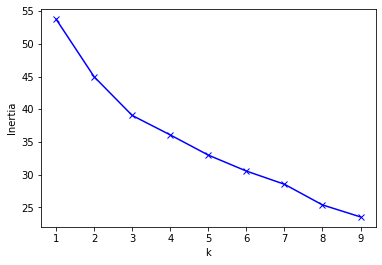

In [5]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [6]:
clusters = 5

model = KMeans(n_clusters=clusters, random_state=0)
labels = model.fit_predict(test_data)

print(labels)

[0 2 3 1 1 1 1 2 0 3 2 4 3 1 1 1 2 0 3 3 3 1 4 4 2 1 1 3 1 4]


In [7]:
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(test_data[labels == i , 0] , test_data[labels == i , 1] , label = i)
plt.show()

TypeError: '(array([ True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False]), 0)' is an invalid key

# K Prototypes

In [8]:
data = pd.read_csv("train_handmade.csv", sep=";").drop(["severity score", "name"], axis=1)

In [9]:
kproto = KPrototypes(n_clusters=5, init='Cao', n_jobs=-1)

clusters = kproto.fit_predict(test_data_normalized, categorical=[0, 1])

print(clusters)
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((test_data,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

[1 2 0 2 2 1 0 2 4 1 4 3 3 2 3 2 2 1 3 0 4 2 4 4 2 0 1 4 0 4]


# Classify people into categories (obesity, old, ...)

In [10]:
train_clusters = pd.read_csv("train_cluster_patients.csv", sep=";")
train_clusters.head()

,sexe,age,size,weight,smoker,sporty,chronic disease,malnutrition,category
0,0,21,167,90,1,0,0,0,obese + smoker
1,0,45,175,75,1,1,1,0,normal + smoker
2,1,70,160,50,0,0,0,0,old + menopause
3,1,20,180,45,1,1,0,0,anorexy + smoker
4,0,67,167,67,1,1,1,0,old + smoker


In [11]:
dummies = train_clusters["category"].str.get_dummies(sep="+")
train_clusters = pd.concat([train_clusters, dummies], axis=1).drop("category", axis=1)
train_clusters.head()

,sexe,age,size,weight,smoker,sporty,chronic disease,malnutrition,menopause,menopause,smoker,anorexy,normal,obese,old
0,0,21,167,90,1,0,0,0,0,0,1,0,0,1,0
1,0,45,175,75,1,1,1,0,0,0,1,0,1,0,0
2,1,70,160,50,0,0,0,0,1,0,0,0,0,0,1
3,1,20,180,45,1,1,0,0,0,0,1,1,0,0,0
4,0,67,167,67,1,1,1,0,0,0,1,0,0,0,1


In [12]:
nb_features = 8
X = train_clusters.iloc[:, :nb_features]
y = train_clusters.iloc[:, nb_features:]

In [23]:
test_size = 0.2
random_state = 40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
y_test

,menopause,menopause,smoker,anorexy,normal,obese,old
2,1,0,0,0,0,0,1
13,0,0,1,1,0,0,0
17,0,0,1,0,0,0,1
29,0,0,1,0,0,1,0
16,1,0,0,0,0,0,1
25,1,0,0,0,0,0,1
23,0,1,1,0,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)

accuracy_score(y_test, y_pred)

[[1 0 0 0 0 0 1]
 [0 0 1 1 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 1 0 0 1 0]
 [0 1 1 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 1 1 0 0 0 1]]


0.7142857142857143

In [21]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 3}